In [80]:
import pandas as pd
from fastai.vision.all import *
from fastai.torch_basics import *
from tqdm.auto import tqdm
from PIL import Image

/home/zeroql/webdev/datamind/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
path = './dataset/train/'
images_path= path + 'images/'
test_path = './dataset/test/images/'
csv_path = path + 'labels.csv'
csv_path

'./dataset/train/labels.csv'

In [ ]:
files = get_image_files(images_path)
df = pd.read_csv(csv_path)
df.groupby('emp_id').size().sort_values()

(#1179) [Path('dataset/train/images/face_1234.jpg'),Path('dataset/train/images/face_0689.jpg'),Path('dataset/train/images/face_1376.jpg'),Path('dataset/train/images/face_0102.jpg'),Path('dataset/train/images/face_0209.jpg'),Path('dataset/train/images/face_1666.jpg'),Path('dataset/train/images/face_0846.jpg'),Path('dataset/train/images/face_0175.jpg'),Path('dataset/train/images/face_0184.jpg'),Path('dataset/train/images/face_1629.jpg'),Path('dataset/train/images/face_1032.jpg'),Path('dataset/train/images/face_0040.jpg'),Path('dataset/train/images/face_0932.jpg'),Path('dataset/train/images/face_0382.jpg'),Path('dataset/train/images/face_1738.jpg'),Path('dataset/train/images/face_1616.jpg'),Path('dataset/train/images/face_0290.jpg'),Path('dataset/train/images/face_1387.jpg'),Path('dataset/train/images/face_0712.jpg'),Path('dataset/train/images/face_1088.jpg')...]

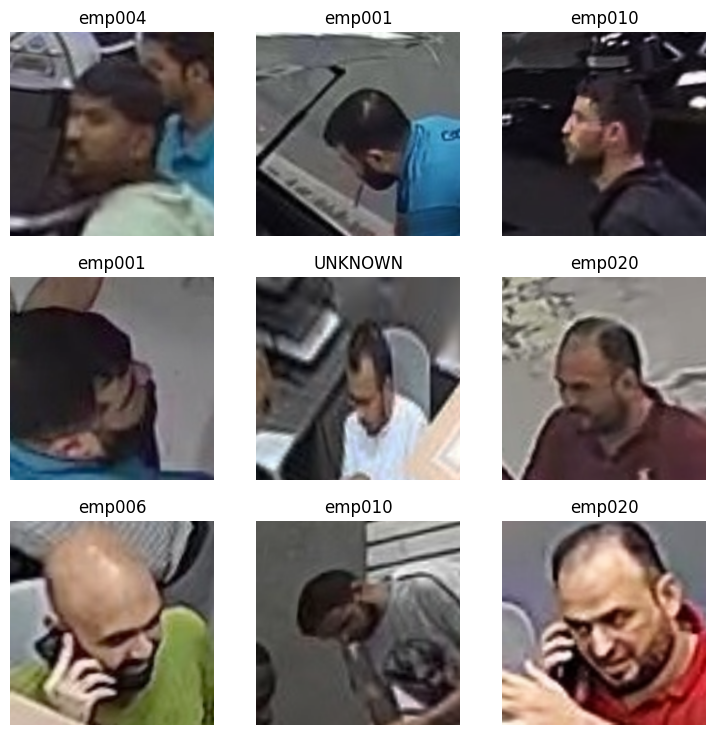

In [34]:
# Create ImageDataLoaders from CSV
dls = ImageDataLoaders.from_csv(
    path='./dataset/train/',
    csv_fname='labels.csv',
    folder='images',
    fn_col='filename',
    label_col='emp_id',
    valid_pct=0.2,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224)
)
dls
# Show batch to verify the data loading
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(10)

epoch     train_loss  valid_loss  accuracy  time    
epoch     train_loss  valid_loss  accuracy  time    -| 0.00% [0/14 00:00<?]


In [72]:
def predict_image(image):
	return learn.predict(test_path+image)[0]
#test_path
results = []

In [ ]:
for image in os.listdir(test_path):
	prediction = dict(filename=image, emp_id=predict_image(image))
	results.append(prediction)

In [112]:
results_df = pd.DataFrame.from_dict(results)
hi = results_df.drop_duplicates()
hi

,image,emp_id
0,face_1061.jpg,emp011
1,face_1187.jpg,emp035
2,face_0646.jpg,emp002
3,face_0092.jpg,emp014
4,face_1591.jpg,emp020
...,...,...
877,face_1530.jpg,emp006
878,face_0935.jpg,emp031
879,face_1163.jpg,emp025
880,face_1228.jpg,emp010


In [ ]:
hi.to_csv('submission_10.csv', index=False)